# imports

In [87]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import librosa ## used to deal with audio files
import librosa.display

from IPython.display import Audio

# features

In [90]:
labels_df = pd.read_csv('../Data/work.csv', sep='\t')
labels_df.head()

Unnamed: 0,path,accent,label,folder
0  0,common_voice_en_19687170.mp3,us,3,2
1  1,common_voice_en_19687171.mp3,us,3,2
2  2,common_voice_en_19687172.mp3,us,3,2
3  3,common_voice_en_19687173.mp3,us,3,2
4  4,common_voice_en_19687174.mp3,us,3,2

In [93]:
audio_path = '../audio/common_voice_en_19666102.mp3'
y, sr = librosa.load(audio_path)

In [94]:
Audio(data=y, rate=sr)

In [96]:
def show_waveform(audio, sr):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sr)
    plt.title('waveform')
    plt.xlabel('time (s)')
    plt.ylabel("Amplitude")
    plt.show

def show_waveform_db(audio, sr):
    plt.figure(figsize=(10, 4))
    db = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(db, sr=sr, x_axis='time', y_axis='hz', cmap='coolwarm')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Waveform in dB')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

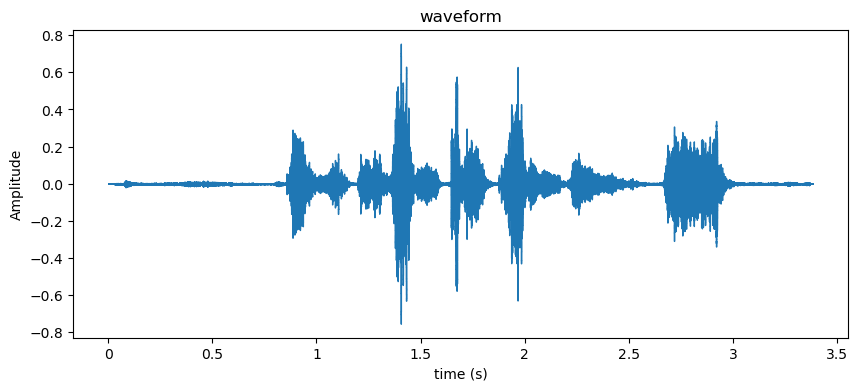

In [97]:
show_waveform(y, sr)

In [98]:
def unsilenced_audio(audio):
    unsilenced = []
    time_intervals = librosa.effects.split(audio, top_db=25, ref=np.max).tolist()
    for start, end in time_intervals:
        unsilenced += audio.tolist()[start:end+1]
    unsilenced = np.array(unsilenced)

    return unsilenced

In [99]:
y_unsilenced = unsilenced_audio(y)

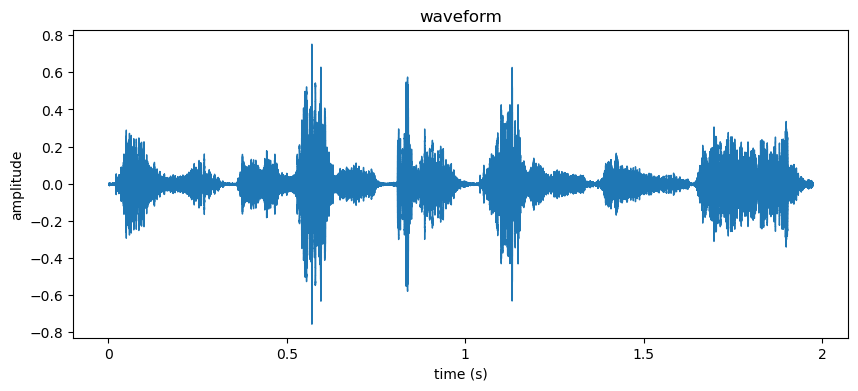

In [100]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_unsilenced, sr=sr)
plt.title('waveform')
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()

In [101]:
Audio(data=y_unsilenced, rate=sr)

## Dealing with different Loudness

In [102]:
import librosa
import numpy as np

def get_loudness(audio):
    rms = librosa.feature.rms(y=audio)[0]
    mean_rms = float(np.mean(rms))
    return mean_rms

In [ ]:
from IPython.display import Audio

# If you have the file path
Audio(filename='../Data/common_voice_en_195777.mp3')

# Or if you have the audio data and sampling rate from librosa
import librosa
loud1, sr1 = librosa.load('../Data/common_voice_en_195777.mp3', sr=None, mono=True)
loud4 = loud1.copy()
Audio(data=loud1, rate=sr1)


In [ ]:
print(get_loudness(loud1))

0.00012427200272213668


In [ ]:
loud2, sr2 = librosa.load('../Data/common_voice_en_17304191.mp3', sr=None, mono=True)
loud3 = loud2.copy()
Audio(data=loud2, rate=sr2)

In [ ]:
print(get_loudness(loud2))

0.47616061568260193


In [103]:
import numpy as np

def normalize_loudness(audio): 
    rms = np.sqrt(np.mean(audio**2))
    current_db = 20 * np.log10(rms)
    target_db = -20.0
    gain = target_db - current_db
    audio_normalized = audio * (10**(gain / 20))
    return audio_normalized

In [ ]:
loud1 = normalize_loudness(loud1)

Audio(data=loud1, rate=sr1)

In [ ]:
print(get_loudness(loud1))

0.049094539135694504


In [ ]:
loud2 = normalize_loudness(loud2)

Audio(data=loud2, rate=sr2)

In [ ]:
print(get_loudness(loud2))

0.08207220584154129


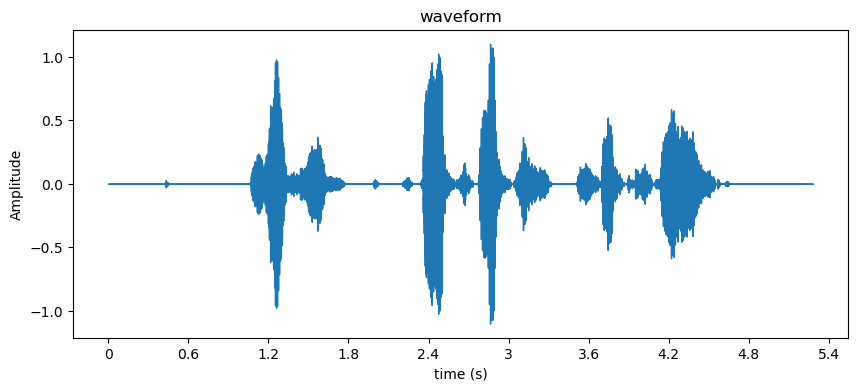

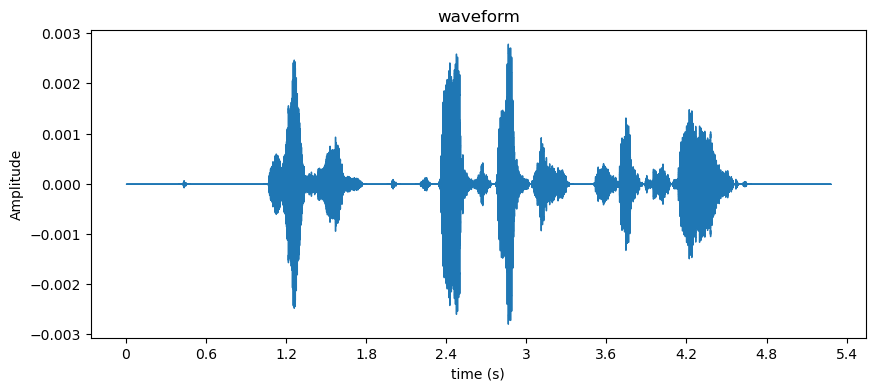

In [ ]:
show_waveform(loud1, sr1)
show_waveform(loud4, sr1)

In [ ]:
print(np.max(loud1), np.max(loud4))

1.101431 0.0027880298


In [ ]:
print(np.max(loud2), np.max(loud3))

0.34537607 2.003778


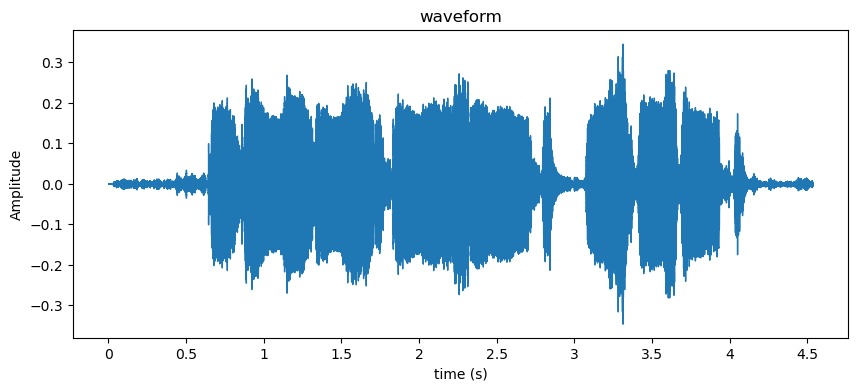

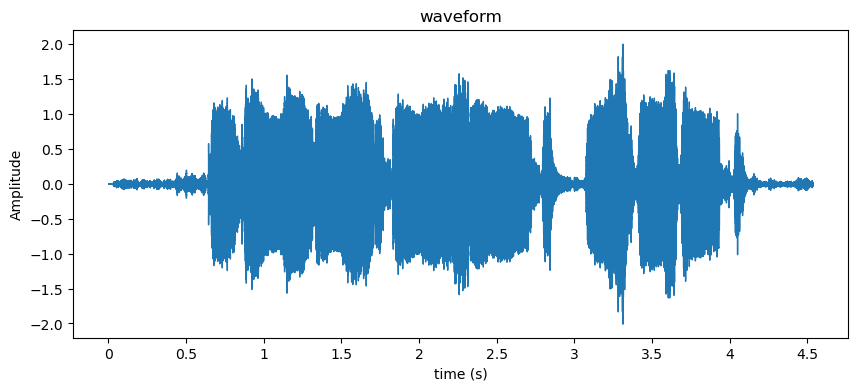

In [ ]:
show_waveform(loud2, sr2)
show_waveform(loud3, sr2)

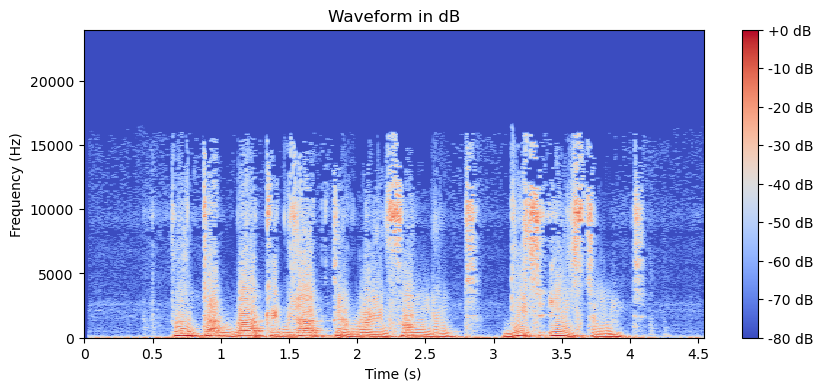

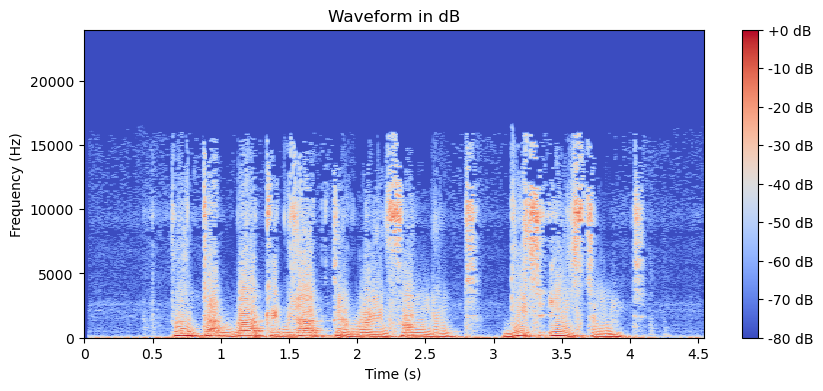

In [ ]:
show_waveform_db(loud2, sr2)
show_waveform_db(loud3, sr2)

## Extraction 

In [ ]:
audio_path = '../Data/common_voice_en_19687170.mp3'
y, sr = librosa.load(audio_path, sr=None, mono=True)
Audio(data=y, rate=sr)

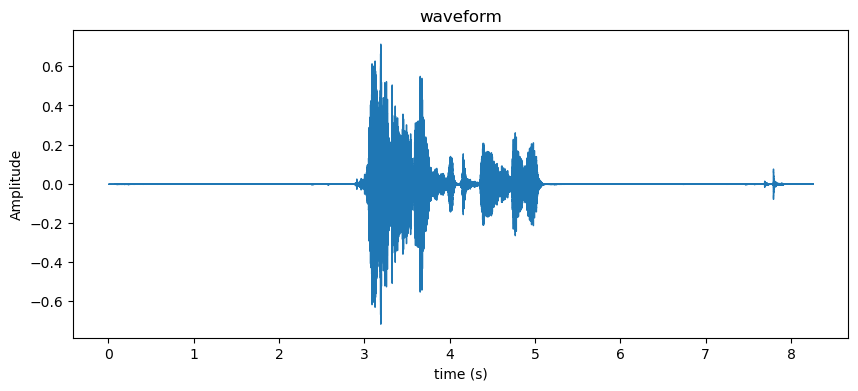

In [ ]:
show_waveform(y, sr=sr)

In [ ]:
y_unsilenced = unsilenced_audio(audio=y)
audio = normalize_loudness(audio=y_unsilenced)

Audio(data=audio, rate=sr)

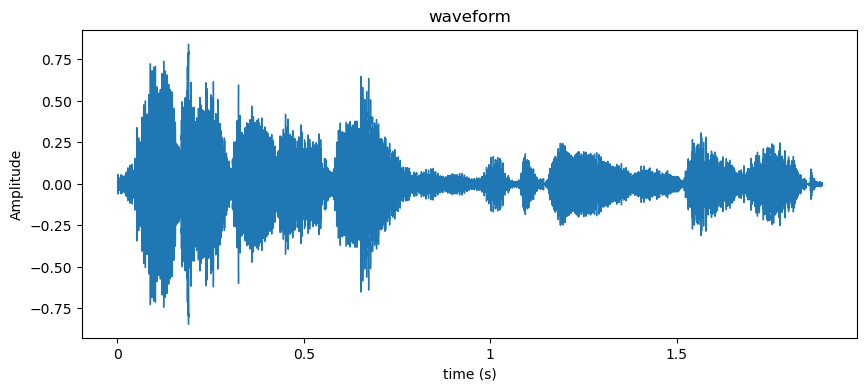

In [ ]:
show_waveform(audio, sr=sr)

## Fundamental frequency

it is an array of frequencies, so it is better to get statistical data about them: 
* mean
* avg
* range (max - min)
* median 
* std

In [ ]:
f0, voiced_flag, voiced_probs = librosa.pyin(
    audio, 
    fmin=librosa.note_to_hz('C2'), 
    fmax=librosa.note_to_hz('C7')
)

f0_df = pd.DataFrame({
    "f0": f0,
    "voiced_flag": voiced_flag,
    "voiced_probs": voiced_probs
})

f0_df

f0  voiced_flag  voiced_probs
0           NaN        False      0.010259
1           NaN        False      0.010019
2     90.909535         True      0.010000
3    106.252996         True      0.010000
4     97.434427         True      0.010001
..          ...          ...           ...
173         NaN        False      0.011086
174         NaN        False      0.092038
175         NaN        False      0.372136
176         NaN        False      0.372136
177         NaN        False      0.030107

[178 rows x 3 columns]

In [ ]:
f0_df = f0_df[(f0_df['f0'].isna() == False)]
f0_df.describe()

f0  voiced_probs
count  118.000000    118.000000
mean    83.495277      0.192714
std     12.754235      0.217864
min     65.406391      0.010000
25%     72.572935      0.013074
50%     80.524713      0.092038
75%     93.438652      0.372136
max    106.252996      0.757160

In [ ]:
f0 = f0[~np.isnan(f0)]
np.std(f0)

12.700076715944707

In [ ]:
np.max(f0) - np.min(f0)

40.84660485658334

In [ ]:
def extract_f0_feature(audio):
    f0, voiced_flag, voiced_probs = librosa.pyin(
        audio, 
        fmin=librosa.note_to_hz('C2'), 
        fmax=librosa.note_to_hz('C7')
    )
    
    f0 = np.array(f0[~np.isnan(f0)])
    return f0.mean(), f0.std(), f0.max(), f0.min(), f0.max() - f0.min()

In [ ]:
extract_f0_feature(audio)

(83.49527671966413,
 12.700076715944707,
 106.252996181733,
 65.40639132514966,
 40.84660485658334)

## Formants

In [ ]:
import parselmouth as pm # type: ignore

def extract_formants_feature(audio, sr, max_formants=3):
    snd = pm.Sound(audio, sampling_frequency=sr)

    # Perform formant analysis
    formant = snd.to_formant_burg()
    
    # Extract formants for each time frame
    formants = []
    for t in np.arange(0, snd.duration, 0.01):  # Analyze every 10ms
        frame_formants = []
        for i in range(1, max_formants + 1):  # Extract up to max_formants
            try:
                frame_formants.append(formant.get_value_at_time(i, t))
            except ValueError:
                frame_formants.append(None)
        formants.append(frame_formants)
    
    return np.array(np.nanmean(np.array(formants), axis=0))

In [ ]:
formants = extract_formants_feature(audio, sr)
formants

array([ 728.21664269, 2204.19601298, 3326.181534  ])

## Getting local shimmer and jitter

In [ ]:
def extract_shimmer_and_jitter_features(audio, sr):
    sound = pm.Sound(audio, sampling_frequency=sr)

    point_process = sound.to_point_process_periodic_cc()

    # Jitter (local)
    jitter = pm.praat.call(
        point_process, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3
    )

    # Shimmer (local)
    shimmer = pm.praat.call(
        [sound, point_process], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6
    )

    return [shimmer, jitter]

In [ ]:
# shimmer, jitter = extract_shimmer_and_jitter_features(audio, sr)
# print(shimmer, jitter)

AttributeError: 'parselmouth.Sound' object has no attribute 'to_point_process_periodic_cc'

In [ ]:
import numpy as np
import librosa

def extract_mfcc_statistics(file_path, n_mfcc=13):
    # Load audio file
    y, sr = librosa.load(file_path, sr=None)
    
    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    print(mfccs.shape)
    
    # Compute statistical summaries for each MFCC coefficient
    mfccs_mean = np.mean(mfccs, axis=1)  # Mean
    mfccs_var = np.var(mfccs, axis=1)    # Variance
    mfccs_min = np.min(mfccs, axis=1)    # Minimum
    mfccs_max = np.max(mfccs, axis=1)    # Maximum
    mfccs_percentile_25 = np.percentile(mfccs, 25, axis=1)  # 25th percentile
    mfccs_percentile_75 = np.percentile(mfccs, 75, axis=1)  # 75th percentile
    
    # Combine all statistics into a single feature vector
    mfcc_statistics = np.concatenate([
        mfccs_mean, mfccs_var, mfccs_min, mfccs_max, 
        mfccs_percentile_25, mfccs_percentile_75
    ])
    
    return mfcc_statistics

# Example usage
file_path = "../audio/common_voice_en_19802937.mp3"  # Replace with your file path
mfcc_stats = extract_mfcc_statistics(file_path)
print(mfcc_stats.shape)
print(mfcc_stats)

(13, 572)
(78,)
[-3.39049866e+02  1.32718536e+02  4.09268570e+00  4.98685074e+00
  1.61308212e+01  4.14678669e+00  8.47023487e+00  2.35119200e+00
 -1.83728731e+00  2.06218171e+00 -8.25006866e+00 -8.83298206e+00
 -1.07826889e+00  9.35987891e+03  5.39993262e+03  1.49783875e+03
  6.97226501e+02  4.87383240e+02  3.50338898e+02  2.32159256e+02
  2.19617950e+02  1.26407806e+02  2.01349350e+02  1.31403931e+02
  1.27398140e+02  1.07378380e+02 -5.07691315e+02  0.00000000e+00
 -1.09335403e+02 -7.25627747e+01 -5.54838181e+01 -4.33860855e+01
 -3.73112564e+01 -3.41191330e+01 -3.51780243e+01 -2.77364044e+01
 -4.00237274e+01 -4.38971710e+01 -3.15942745e+01 -1.66086014e+02
  2.49368454e+02  8.52524567e+01  7.88810806e+01  7.26916199e+01
  6.22236061e+01  5.65114632e+01  3.75635719e+01  3.09304504e+01
  4.54222260e+01  2.06355457e+01  1.51147938e+01  2.89481049e+01
 -4.37803383e+02  6.36966419e+01 -2.07193928e+01 -1.07999115e+01
  1.24200457e+00 -1.07893434e+01 -1.19737688e+00 -8.20587468e+00
 -9.96952

In [129]:
import numpy as np
from sklearn.decomposition import PCA
import librosa

def extract_mfcc_statistics(file_path, n_mfcc=13, n_components=20):
    # Load audio file
    y, sr = librosa.load(file_path, sr=None)
    
    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    print(mfccs.shape)
    
    # Compute statistical summaries for each MFCC coefficient
    mfccs_mean = np.mean(mfccs, axis=1)  # Mean
    mfccs_var = np.var(mfccs, axis=1)    # Variance
    mfccs_min = np.min(mfccs, axis=1)    # Minimum
    mfccs_max = np.max(mfccs, axis=1)    # Maximum
    mfccs_percentile_25 = np.percentile(mfccs, 25, axis=1)  # 25th percentile
    mfccs_percentile_75 = np.percentile(mfccs, 75, axis=1)  # 75th percentile
    
    # Combine all statistics into a single feature vector
    mfcc_statistics = np.column_stack([
        mfccs_mean, mfccs_var, mfccs_min, mfccs_max, 
        mfccs_percentile_25, mfccs_percentile_75
    ],)

    print(mfccs_mean.shape)
    print(mfcc_statistics.shape, mfcc_statistics.reshape(1, -1).shape)
    
    # Apply PCA to reduce dimensionality
    pca = PCA(n_components=n_components)
    mfcc_statistics_reduced = pca.fit_transform(mfcc_statistics)

    print('final: ', mfcc_statistics_reduced.shape)
    
    return mfcc_statistics_reduced.flatten()

# Example usage
file_path = "../audio/common_voice_en_19666102.mp3"  # Replace with your file path
mfcc_stats = extract_mfcc_statistics(file_path, 13, 1)
print(mfcc_stats.shape)
# print(mfcc_stats)

(13, 318)
(13,)
(13, 6) (1, 78)
final:  (13, 1)
(13,)


In [ ]:

def get_features_from_audio(audio_path: str) -> list:
    """
    add your feature extraction logic here
    """
    pass


def get_Dataframe(labels_df: pd.DataFrame, target_label: str) -> pd.DataFrame:
    """
    Process audio files listed in labels_df, extract features, and return a DataFrame
    """
    feature_name = [] ## list of feature names you used
    feature_length =[] ## list of feature lengths you used
    all_features=[] ## list of all actual features values
    columns = [] ## list of columns names for the DataFrame

    for index, row in labels_df.iterrows():
        audio_path = os.path.join('../Data/', row['path'])

        if os.path.isfile(audio_path):
            features = get_features_from_audio(audio_path)
            features.append(row[target_label])
            all_features.append(features)
        else:
            print(f"File not found: {audio_path}")

    # Automatically determine feature names based on length of feature vector
    if all_features:
        for i in range(len(feature_name)):
            columns.append([f"{feature_name[i]}_{j}" for j in range(feature_length[i])])
    else:
        features_names = []

    return pd.DataFrame(all_features, columns=features_names)